In [58]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.impute import SimpleImputer, KNNImputer
import matplotlib.pyplot as plt
import seaborn as sns

In [59]:
data = pd.read_csv('../dataset_final/togo_dataset_final.csv')

In [60]:
# Séparation des variables numériques et catégorielles
numeric_cols = data.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = data.select_dtypes(include=['object', 'category']).columns

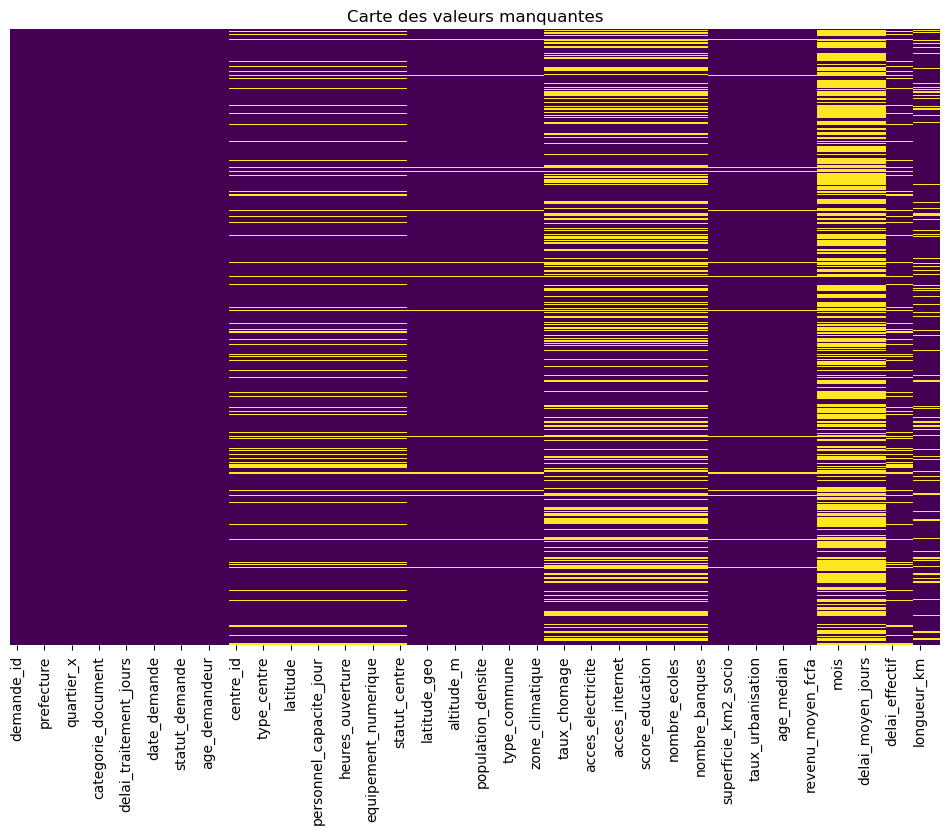

In [61]:
# Visualisation des valeurs manquantes
plt.figure(figsize=(12, 8))
sns.heatmap(data.isnull(), cbar=False, yticklabels=False, cmap='viridis')
plt.title('Carte des valeurs manquantes')
plt.show()

In [62]:
print(f"Nombre total de valeurs manquantes: {data.isnull().sum().sum()}")
print(data.isnull().sum().sort_values(ascending=False))

Nombre total de valeurs manquantes: 11501
annee                      753
nombre_demandes_mensuel    753
delai_moyen_jours          753
taux_rejet_moyen           753
mois                       753
                          ... 
statut_demande               0
quartier_x                   0
type_document                0
categorie_document           0
nombre_demandes              0
Length: 68, dtype: int64


#  Traitement des valeurs manquantes

In [63]:
# KNN Imputer pour les variables numériques (plus sophistiqué)
knn_imputer = KNNImputer(n_neighbors=5)
data[numeric_cols] = knn_imputer.fit_transform(data[numeric_cols])

In [64]:
# Pour les variables catégorielles
cat_imputer = SimpleImputer(strategy='most_frequent')
data[categorical_cols] = cat_imputer.fit_transform(data[categorical_cols])

# Normalisation des données numériques

In [65]:
#RobustScaler 
robust_scaler = RobustScaler()
data_robust = data.copy()
data_robust[numeric_cols] = robust_scaler.fit_transform(data[numeric_cols])

# Visualisation de la distribution avant/après normalisation

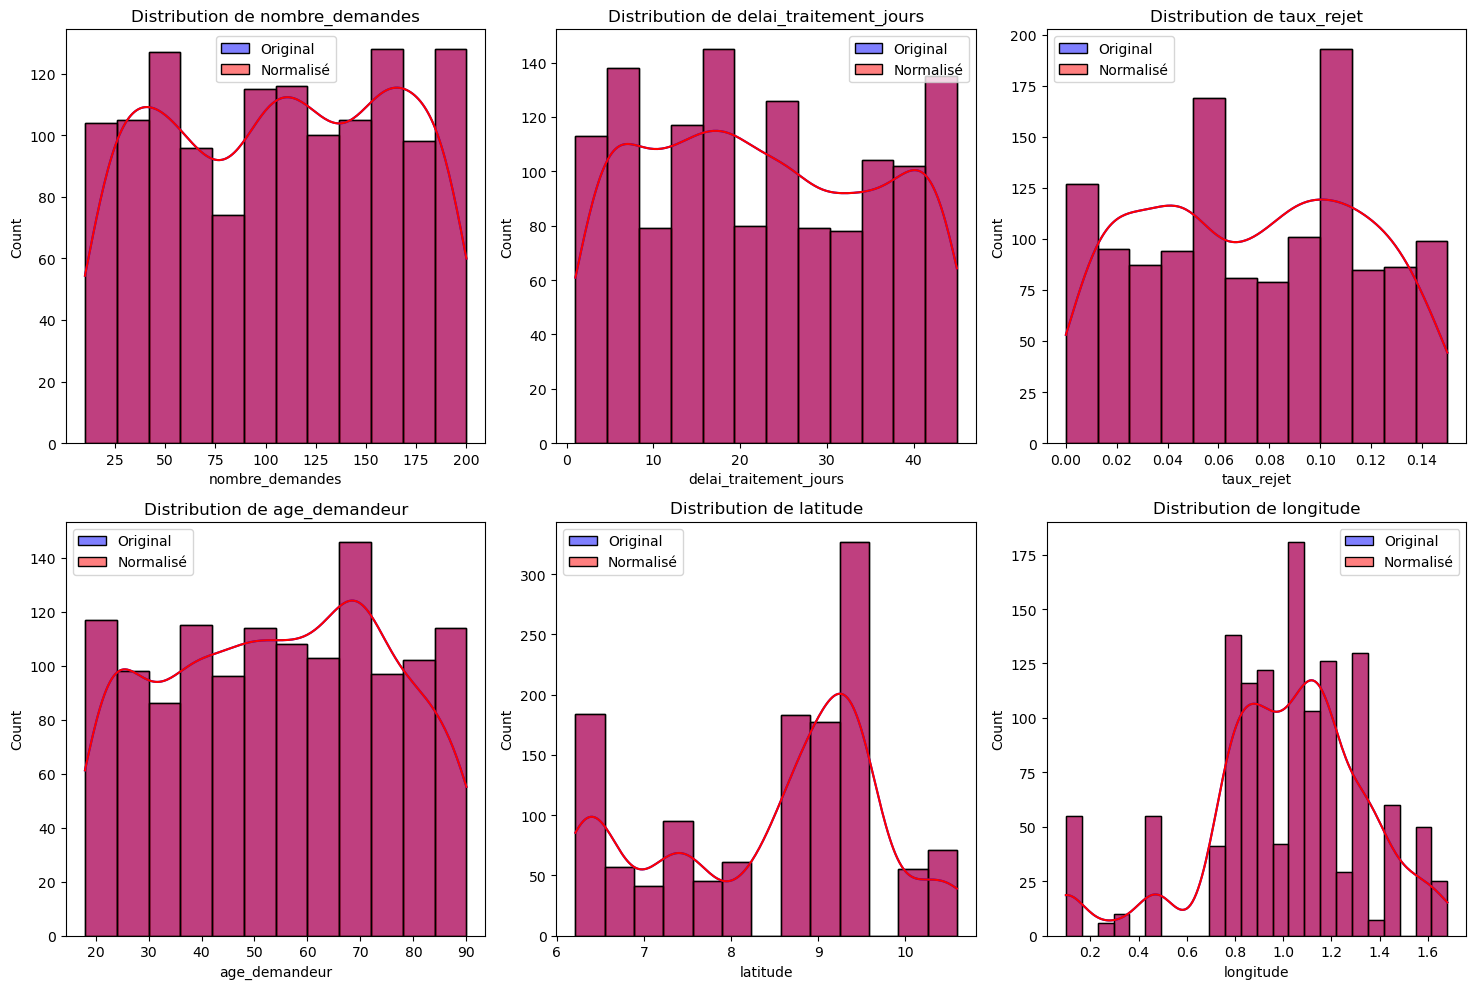

In [66]:

plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_cols[:min(6, len(numeric_cols))]):
    plt.subplot(2, 3, i+1)
    sns.histplot(data[col], kde=True, color='blue', alpha=0.5, label='Original')
    sns.histplot(data[col], kde=True, color='red', alpha=0.5, label='Normalisé')
    plt.title(f'Distribution de {col}')
    plt.legend()
plt.tight_layout()
plt.show()

In [67]:
data.isna().sum()

demande_id               0
region                   0
prefecture               0
commune                  0
quartier_x               0
                        ..
taux_rejet_moyen         0
delai_effectif           0
nombre_rejete            0
longueur_km              0
temps_parcours_heures    0
Length: 68, dtype: int64

# Enregistremen de la dataframe en format CSV

In [68]:
data.to_csv('../dataset_final/togo_dataset_final_propre.csv', index=False)  